In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

In [2]:
ER = np.array([22.9, 94.8, 29.5, 29.6, 387, 29.8, 532]) #erosion rates
ERU = np.array([3.02, 12.4, 3.88, 3.89, 50.5, 3.91, 69.2]) #erosion rate uncertainty
WA = np.array([1384.897767, 5762.458276, 189.3748424, 4706.304332, 1495.57222, 2573.048797, 1207.494926]) #watershed areas
PR = np.array([20.2808125, 13.03263, 5.5128125, 14.3338, 18.1116, 14.672775, 20.14285]) #production rates


In [3]:
# CT-3 erosion rate and uncertainty
number_samples = 100000

CT_3_samples = np.random.normal(ER[2], ERU[2], number_samples)

print("CT-3: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_3_samples), np.std(CT_3_samples)))

# CT-2 erosion rate and uncertainty
number_samples = 100000

CT_2_samples = np.random.normal(ER[1], ERU[1], number_samples)

print("CT-2: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_2_samples), np.std(CT_2_samples)))

CT-3: 29.5330 ± 3.8900
CT-2: 94.7823 ± 12.3430


Success Fraction of Samples: 0.2846
CT-7: 470.2687 ± 53.3483
CT-5: 426.9487 ± 41.3244
CT-7, CT-5 correlation: 0.5871


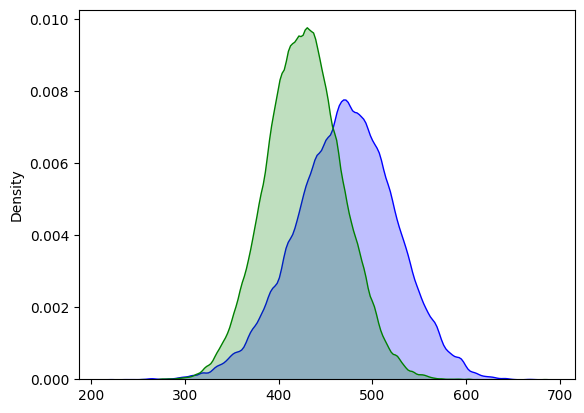

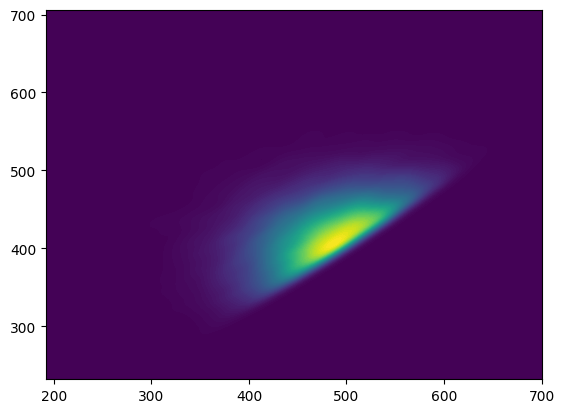

In [4]:
# CT-7 and CT-5:

number_samples = 100000

CT_7_samples = np.random.normal(ER[6], ERU[6], number_samples)
CT_5_samples = np.random.normal(ER[4], ERU[4], number_samples)

flux_7 = WA[6] * CT_7_samples
flux_5 = WA[4] * CT_5_samples

i1 = np.where(flux_5 > flux_7)

plt.figure()

sns.kdeplot(CT_7_samples[i1], bw_adjust=.5, fill=True, color="blue")
sns.kdeplot(CT_5_samples[i1], bw_adjust=.5, fill=True, color="green")

plt.figure()
sns.kdeplot(x=CT_7_samples[i1], y=CT_5_samples[i1], fill=True, thresh=0, levels=100, cmap="viridis")

print("Success Fraction of Samples: {0:6.4f}".format(i1[0].size / number_samples))
print("CT-7: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_7_samples[i1]), np.std(CT_7_samples[i1])))
print("CT-5: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_5_samples[i1]), np.std(CT_5_samples[i1])))
print("CT-7, CT-5 correlation: {0:6.4f}".format(np.corrcoef(CT_7_samples[i1], CT_5_samples[i1])[0,1]))

Success Fraction of Samples: 1.0000
CT-1: 22.9148 ± 3.0239
CT-6: 29.7864 ± 3.9125
CT-1, CT-6 correlation: -0.0047


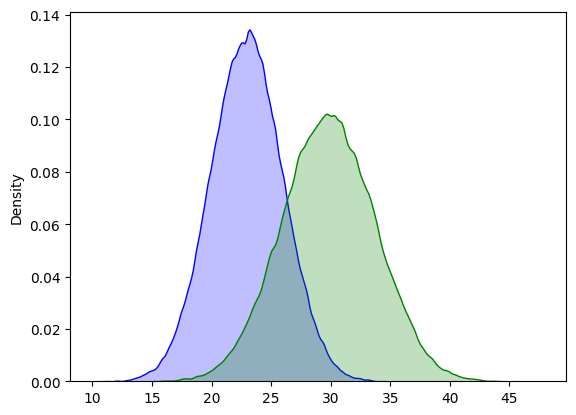

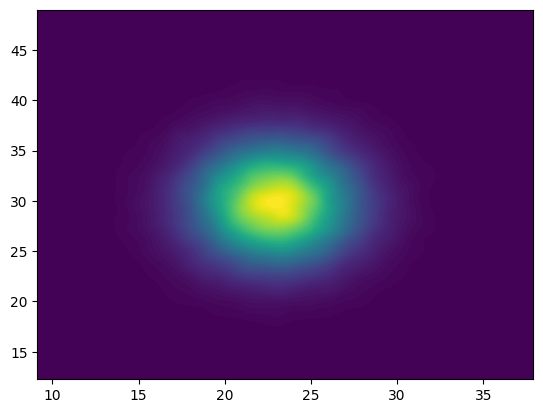

In [5]:
# CT-1 and CT-6:

number_samples = 100000

CT_1_samples = np.random.normal(ER[0], ERU[0], number_samples)
CT_6_samples = np.random.normal(ER[5], ERU[5], number_samples)

flux_1 = WA[0] * CT_1_samples
flux_6 = WA[5] * CT_6_samples

i2 = np.where(flux_6 > flux_1)

plt.figure()

sns.kdeplot(CT_1_samples[i2], bw_adjust=.5, fill=True, color="blue")
sns.kdeplot(CT_6_samples[i2], bw_adjust=.5, fill=True, color="green")

plt.figure()
sns.kdeplot(x=CT_1_samples[i2], y=CT_6_samples[i2], fill=True, thresh=0, levels=100, cmap="viridis")

print("Success Fraction of Samples: {0:6.4f}".format(i2[0].size / number_samples))
print("CT-1: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_1_samples[i2]), np.std(CT_1_samples[i2])))
print("CT-6: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_6_samples[i2]), np.std(CT_6_samples[i2])))
print("CT-1, CT-6 correlation: {0:6.4f}".format(np.corrcoef(CT_1_samples[i2], CT_6_samples[i2])[0,1]))

CT-5 ER: 386.8910 ± 50.4994
CT-6 ER: 29.7876 ± 3.9176
Qb/Qa Fertility Ratio (mean, (25-75% range)): 424.3988 (29.5472 - 105.4789)
Qb/Qa Fertility Ratio (median, (25-75% range)): 50.5383 (29.5472 - 105.4789)


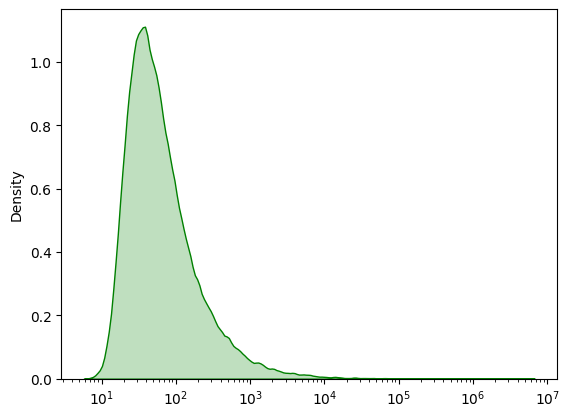

In [6]:
# Flux ordered using CT-5 and CT-6 to mix and form CT-4 with calculated fertilities.

# CT-5 and CT-6:

number_samples = 100000

CT_1_samples = np.random.normal(ER[0], ERU[0], number_samples)
CT_6_samples = np.random.normal(ER[5], ERU[5], number_samples)

CT_7_samples = np.random.normal(ER[6], ERU[6], number_samples)
CT_5_samples = np.random.normal(ER[4], ERU[4], number_samples)

flux_7 = WA[6] * CT_7_samples
flux_5 = WA[4] * CT_5_samples

i1 = np.where(flux_5 > flux_7)

CT_5_ordered = CT_5_samples[i1]

flux_1 = WA[0] * CT_1_samples
flux_6 = WA[5] * CT_6_samples

i2 = np.where(flux_6 > flux_1)

CT_6_ordered = CT_6_samples[i2]

CT_5_resampled = np.random.choice(CT_5_ordered, size = number_samples, replace = True)
CT_6_resampled = np.random.choice(CT_6_ordered, size = number_samples, replace = True)

CT_4_samples = np.random.normal(ER[3], ERU[3], number_samples)

print("CT-5 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_5_samples), np.std(CT_5_samples)))
print("CT-6 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_6_samples), np.std(CT_6_samples)))

# calculating the fertilities

A_a = WA[4]
P_a = PR[4]
E_a = CT_5_samples

A_b = WA[5]
P_b = PR[5]
E_b = CT_6_samples

A_c = WA[3]
P_c = PR[3]
E_c = CT_4_samples

Q = (P_c * E_a * A_a - P_a * E_c * A_a) / (P_b * E_c * A_b - P_c * E_b * A_b)

i_f2 = np.where(Q > 0)

sns.kdeplot(Q[i_f2], bw_adjust=.5, fill=True, color="green", log_scale = True)
print("Qb/Qa Fertility Ratio (mean, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.mean(Q[i_f2]), np.percentile(Q[i_f2], 75), np.percentile(Q[i_f2], 25)))
print("Qb/Qa Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Q[i_f2]), np.percentile(Q[i_f2], 75), np.percentile(Q[i_f2], 25)))

CT-4 ER: 29.6091 ± 3.8919
CT-3 ER: 29.5071 ± 3.9092
Qb/Qa Fertility Ratio (mean, (25-75% range)): 5604.2437 (317.8813 - 1535.6462)
Qb/Qa Fertility Ratio (median, (25-75% range)): 641.7378 (317.8813 - 1535.6462)


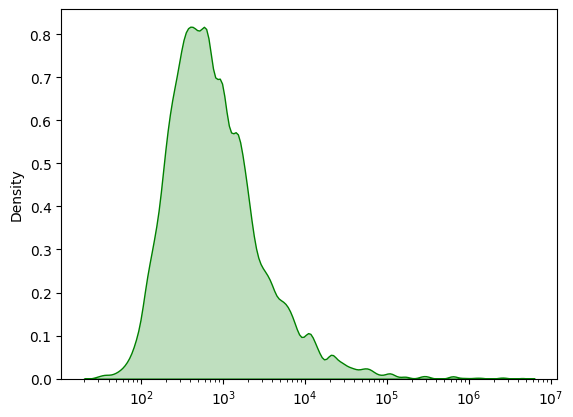

In [7]:
# Flux ordered using CT-4 and CT-3 to mix and form CT-2 with calculated fertilities.

# CT-4 and CT-3:

number_samples = 100000

CT_1_samples = np.random.normal(ER[0], ERU[0], number_samples)
CT_6_samples = np.random.normal(ER[5], ERU[5], number_samples)

CT_7_samples = np.random.normal(ER[6], ERU[6], number_samples)
CT_5_samples = np.random.normal(ER[4], ERU[4], number_samples)

CT_4_samples = np.random.normal(ER[3], ERU[3], number_samples)
CT_3_samples = np.random.normal(ER[2], ERU[2], number_samples)


flux_7 = WA[6] * CT_7_samples
flux_5 = WA[4] * CT_5_samples

flux_1 = WA[0] * CT_1_samples
flux_6 = WA[5] * CT_6_samples

flux_4 = WA[3] * CT_4_samples

i1 = np.where(flux_4 > flux_5)
i2 = np.where(flux_4 > flux_6)

CT_4_ordered = CT_4_samples[i2]

CT_4_resampled = np.random.choice(CT_5_ordered, size = number_samples, replace = True)

print("CT-4 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_4_samples), np.std(CT_4_samples)))
print("CT-3 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_3_samples), np.std(CT_3_samples)))

CT_2_samples = np.random.normal(ER[1], ERU[1], number_samples)

# calculating the fertilities

A_a = WA[3]
P_a = PR[3]
E_a = CT_4_samples

A_b = WA[2]
P_b = PR[2]
E_b = CT_3_samples

A_c = WA[1]
P_c = PR[1]
E_c = CT_2_samples

Q = (P_c * E_a * A_a - P_a * E_c * A_a) / (P_b * E_c * A_b - P_c * E_b * A_b)

i_f2 = np.where(Q > 0)

sns.kdeplot(Q[i_f2], bw_adjust=.5, fill=True, color="green", log_scale = True)
print("Qb/Qa Fertility Ratio (mean, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.mean(Q[i_f2]), np.percentile(Q[i_f2], 75), np.percentile(Q[i_f2], 25)))
print("Qb/Qa Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Q[i_f2]), np.percentile(Q[i_f2], 75), np.percentile(Q[i_f2], 25)))

In [8]:
# subwatershed erosion rates that are flux ordered 
number_samples = 100000

CT_1_samples = np.random.normal(ER[0], ERU[0], number_samples)
CT_6_samples = np.random.normal(ER[5], ERU[5], number_samples)

CT_7_samples = np.random.normal(ER[6], ERU[6], number_samples)
CT_5_samples = np.random.normal(ER[4], ERU[4], number_samples)

CT_2_samples = np.random.normal(ER[1], ERU[1], number_samples)
CT_3_samples = np.random.normal(ER[2], ERU[2], number_samples)

# Fluxes
flux_1 = WA[0] * CT_1_samples
flux_2 = WA[1] * CT_2_samples
flux_3 = WA[2] * CT_3_samples
flux_4 = WA[3] * CT_4_samples
flux_5 = WA[4] * CT_5_samples
flux_6 = WA[5] * CT_6_samples
flux_7 = WA[6] * CT_7_samples

# flux ordering
i1 = np.where(flux_5 > flux_7)
i2 = np.where(flux_6 > flux_1)
i3 = np.where(flux_7 < flux_5)
i4 = np.where(flux_1 < flux_6)
i5 = np.where(flux_2 > flux_4)

# Ordered fluxes
CT_1_ordered = CT_1_samples[i4]
CT_2_ordered = CT_2_samples[i5]
CT_5_ordered = CT_5_samples[i1]
CT_6_ordered = CT_6_samples[i2]
CT_7_ordered = CT_7_samples[i3]

# Resampling
CT_1_resampled = np.random.choice(CT_1_ordered, size = number_samples, replace = True)
CT_2_resampled = np.random.choice(CT_2_ordered, size = number_samples, replace = True)
CT_5_resampled = np.random.choice(CT_5_ordered, size = number_samples, replace = True)
CT_6_resampled = np.random.choice(CT_6_ordered, size = number_samples, replace = True)
CT_7_resampled = np.random.choice(CT_7_ordered, size = number_samples, replace = True)

# calculating the fertilities
# CT-1

# CT-2
A_a2 = WA[3]
E_a2 = CT_4_samples

A_b2 = WA[1]
E_b2 = CT_2_samples

# CT-5
A_a5 = WA[6]
E_a5 = CT_7_resampled

A_b5 = WA[4]
E_b5 = CT_5_resampled

# CT-6
A_a6 = WA[0]
E_a6 = CT_1_resampled

A_b6 = WA[5]
E_b6 = CT_6_resampled

# CT-7

# subwatershed erossion rate equation
ER_Sub2 = ((A_b2*E_b2) - (A_a2*E_a2)) / (A_b2-A_a2)
ER_Sub5 = ((A_b5*E_b5) - (A_a5*E_a5)) / (A_b5-A_a5)
ER_Sub6 = ((A_b6*E_b6) - (A_a6*E_a6)) / (A_b6-A_a6)


i_f2 = np.where(ER_Sub > 0)

print("CT-5 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_5_samples), np.std(CT_5_samples)))
print("CT-6 ER: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_6_samples), np.std(CT_6_samples)))
sns.kdeplot(ER_Sub5[i_f2], bw_adjust=.5, fill=True, color="green", log_scale = True)
print("Subwatershed Erosion Rate 2: {0:6.4f} ± {1:6.4f}".format(np.mean(ER_Sub2[i_f2]), np.std(ER_Sub2[i_f2])))
print("Subwatershed Erosion Rate 5: {0:6.4f} ± {1:6.4f}".format(np.mean(ER_Sub5[i_f2]), np.std(ER_Sub5[i_f2])))
print("Subwatershed Erosion Rate 6: {0:6.4f} ± {1:6.4f}".format(np.mean(ER_Sub6[i_f2]), np.std(ER_Sub6[i_f2])))
print("Subwatershed Erosion Rate 1: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_1_samples[i_f2]), np.std(CT_1_samples[i_f2])))
print("Subwatershed Erosion Rate 7: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_7_samples[i_f2]), np.std(CT_7_samples[i_f2])))
print("Subwatershed Erosion Rate 3: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_3_samples[i_f2]), np.std(CT_3_samples[i_f2])))


NameError: name 'ER_Sub' is not defined

Success Fraction of Samples: 0.0000
CT-4:    nan ±    nan


/Users/Glong1/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/Glong1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/Glong1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Glong1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/Glong1/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


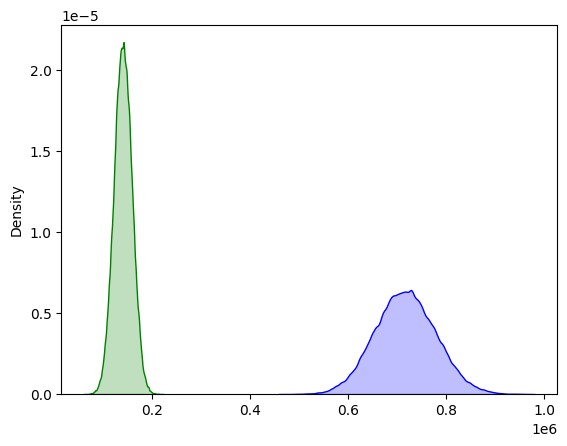

In [9]:
# We now have sub-samples from CT-5 and CT-6, which reflect the appropriate ordering.  
#  These get used to determine success ratio of CT-5 + CT-6 producing CT-4:

total_upstream_flux = np.random.choice(flux_5[i1], size=number_samples, replace=True) + np.random.choice(flux_6[i2], size=number_samples, replace = True)
CT_4_samples = np.random.normal(ER[3], ERU[3], number_samples)
flux_4 = WA[3] * CT_4_samples

i3 = np.where(flux_4 >= total_upstream_flux)

sns.kdeplot(total_upstream_flux, bw_adjust=.5, fill=True, color="blue")
sns.kdeplot(flux_4, bw_adjust=.5, fill=True, color="green")

print("Success Fraction of Samples: {0:6.4f}".format(i3[0].size / number_samples))
print("CT-4: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_4_samples[i3]), np.std(CT_4_samples[i3])))

Success ratio: 0.4849
Fertility Ratio: 316.8283 ± 7710.0684
Fertility Ratio (median, (25-75% range)): 51.0200 (29.6103 - 106.5944)
51.02004039314656


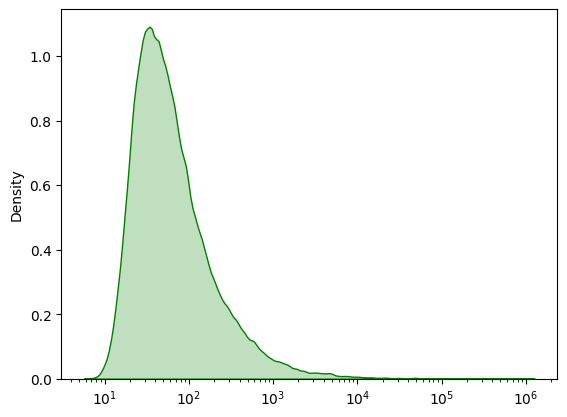

In [19]:
# Quartz fertility calculation for the CT-4, 5, 6 pair:

# basin b will be CT-6
# basin a will be CT-5

CT_6_samples = np.random.normal(ER[5], ERU[5], number_samples)
CT_5_samples = np.random.normal(ER[4], ERU[4], number_samples)
CT_4_samples = np.random.normal(ER[3], ERU[3], number_samples)

A_a = WA[4]
P_a = PR[4]
E_a = CT_5_samples

A_b = WA[5]
P_b = PR[5]
E_b = CT_6_samples

A_c = WA[3]
P_c = PR[3]
E_c = CT_4_samples

# Ensure proper ordering of samples:

i_f1 = np.where(np.logical_or(np.logical_and(CT_4_samples < CT_5_samples, CT_4_samples > CT_6_samples),np.logical_and(CT_4_samples > CT_5_samples, CT_4_samples < CT_6_samples)))

print("Success ratio: {0:6.4f}".format(i_f1[0].size/number_samples))

# Calculate fertility ratios using correctly ordered samples:

Q1 = ( P_c * E_a * A_a - P_a * E_c * A_a ) / (P_b * E_c * A_b - P_c * E_b * A_b)

i_f2 = np.where(Q1 > 0)

sns.kdeplot(Q1[i_f2], bw_adjust=.5, fill=True, color="green", log_scale=True)
print("Fertility Ratio: {0:6.4f} ± {1:6.4f}".format(np.mean(Q1[i_f2]), np.std(Q1[i_f2])))
print("Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Q1[i_f2]), np.percentile(Q1[i_f2], 75), np.percentile(Q1[i_f2], 25)))
print(np.median(Q1[i_f2]))

Success fraction: 1.0000
CT-2: 94.7911 ± 12.3722
CT-Canyon: 20.3385 ± 2.6512


<Axes: ylabel='Density'>

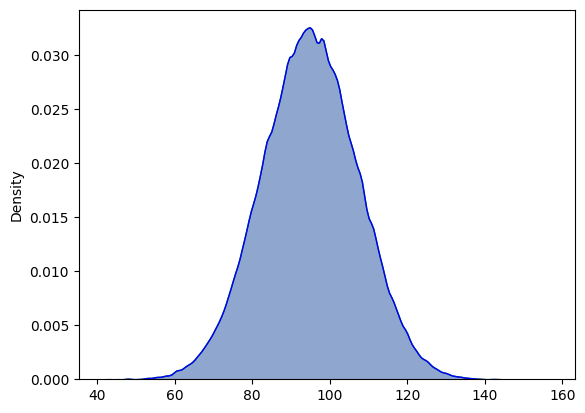

In [11]:
# CT-4, CT-3 to CT-2, scenario 1: flux is properly represented by CT-4:

canyon_erosion_rate = 20.34
canyon_erosion_rate_uncertainty = 0.13 * canyon_erosion_rate
canyon_area = 1056.15

CT_canyon_samples = np.random.normal(canyon_erosion_rate, canyon_erosion_rate_uncertainty, number_samples)

flux_4_s1 = np.random.choice(CT_4_samples, size = number_samples, replace = True) * WA[3]
CT_2_samples = np.random.normal(ER[1], ERU[1], number_samples)

flux_3 = CT_canyon_samples * canyon_area
flux_2 = CT_2_samples * WA[1]

i5 = np.where(flux_2 > (flux_3 + flux_4_s1))

print("Success fraction: {0:6.4f}".format(i5[0].size / number_samples))
print("CT-2: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_2_samples[i5]), np.std(CT_2_samples[i5])))
print("CT-Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(CT_canyon_samples[i5]), np.std(CT_canyon_samples[i5])))
sns.kdeplot(CT_2_samples[i5], bw_adjust=.5, fill=True, color="green")
sns.kdeplot(CT_2_samples, bw_adjust=.5, fill=True, color="blue")

Success ratio: 0.0000


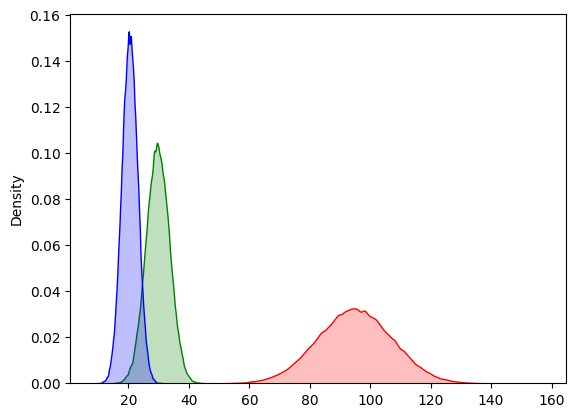

In [12]:
# Quartz fertility calculation for the CT-4, 5, 6 pair, scenario 1:

# basin b will be canyon_samples
# basin a will be CT-4

CT_4_samples = np.random.normal(ER[3], ERU[3], number_samples)

# Ensure proper ordering of samples:

i_f2 = np.where(np.logical_or(np.logical_and(CT_2_samples < CT_4_samples, CT_2_samples > CT_canyon_samples),np.logical_and(CT_2_samples > CT_4_samples, CT_2_samples < CT_canyon_samples)))

sns.kdeplot(CT_2_samples, fill = True, bw_adjust = 0.5, color = 'red')
sns.kdeplot(CT_4_samples, fill = True, bw_adjust = 0.5, color = 'green')
sns.kdeplot(CT_canyon_samples, fill = True, bw_adjust = 0.5, color = 'blue')
print("Success ratio: {0:6.4f}".format(i_f2[0].size/number_samples))


#sns.kdeplot(Q2, bw_adjust=.5, fill=True, color="green", log_scale=True)

Success fraction: 0.1056


<Axes: ylabel='Density'>

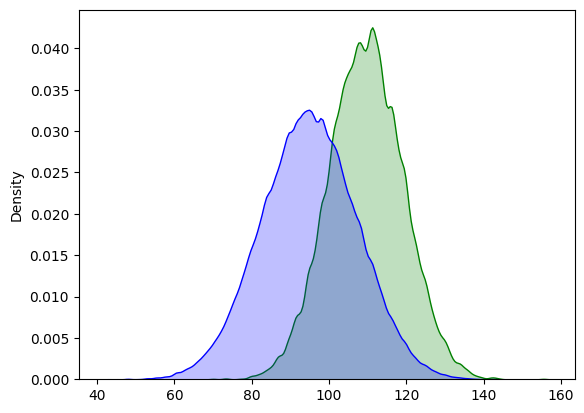

In [13]:
# CT-4, CT-3 to CT-2, scenario 2: flux is properly represented by weighted sum of CT-5 and CT-6

flux_4_s2 = np.random.choice(CT_5_samples[i1], size = number_samples, replace = True) * WA[4] + np.random.choice(CT_6_samples[i2], size = number_samples, replace = True) * WA[5]

i6 = np.where(flux_2 > (flux_3 + flux_4_s2))

print("Success fraction: {0:6.4f}".format(i6[0].size / number_samples))
sns.kdeplot(CT_2_samples[i6], bw_adjust=.5, fill=True, color="green")
sns.kdeplot(CT_2_samples, bw_adjust=.5, fill=True, color="blue")

Success ratio: 0.9983
Fertility Ratio: 18.5025 ± 94.8820
Fertility Ratio (median, (25-75% range)): 13.2708 (8.4384 - 20.2814)


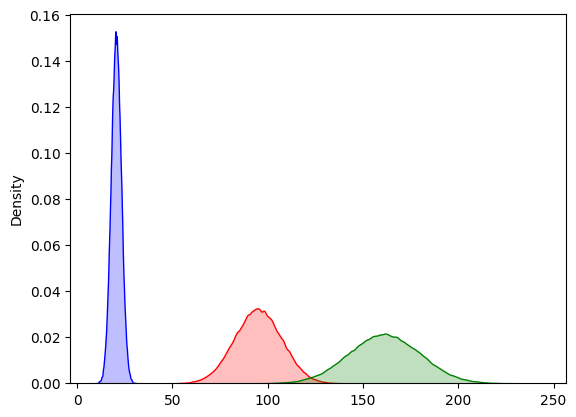

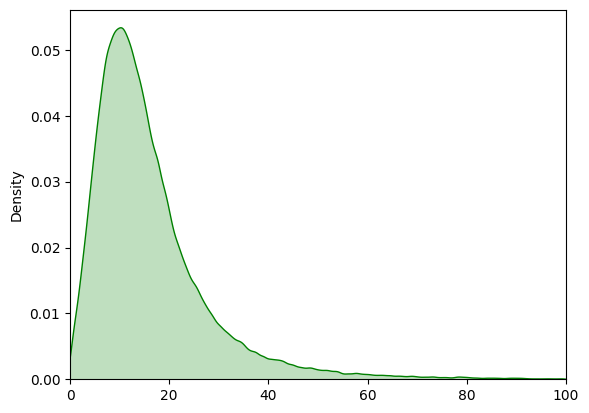

In [18]:
# Quartz fertility calculation for the CT-4, 5, 6 pair, scenario 2:

# basin b will be canyon_samples
# basin a will be sediment flux from area-weighted average of CT-5 and CT-6:

CT_5_6_samples = (CT_5_samples * WA[4] + CT_6_samples * WA[5]) / (WA[4] + WA[5])

A_a = (WA[4] + WA[5])
P_a = PR[3]
E_a = CT_5_6_samples

A_c = WA[1]
P_c = PR[1]
E_c = CT_2_samples

A_b = canyon_area
P_b = 5.080075
E_b = CT_canyon_samples

# Ensure proper ordering of samples:

i_f3 = np.where(np.logical_or(np.logical_and(CT_2_samples < CT_5_6_samples, CT_2_samples > CT_canyon_samples),np.logical_and(CT_2_samples > CT_5_6_samples, CT_2_samples < CT_canyon_samples)))

plt.figure()
sns.kdeplot(CT_2_samples, fill = True, bw_adjust = 0.5, color = 'red')
sns.kdeplot(CT_5_6_samples, fill = True, bw_adjust = 0.5, color = 'green')
sns.kdeplot(CT_canyon_samples, fill = True, bw_adjust = 0.5, color = 'blue')
print("Success ratio: {0:6.4f}".format(i_f3[0].size/number_samples))

# Calculate fertility ratios using correctly ordered samples:

Q3 = ( P_c * E_a * A_a - P_a * E_c * A_a ) / (P_b * E_c * A_b - P_c * E_b * A_b)

plt.figure()
i_f4 = np.where(np.logical_and(Q3 > 0, Q3 < 100))
sns.kdeplot(Q3[i_f4], gridsize = 5000, bw_adjust=.5, fill=True, color="green")
plt.xlim([0, 100])
i_f = np.where(Q3 > 0)

print("Fertility Ratio: {0:6.4f} ± {1:6.4f}".format(np.mean(Q3[i_f]), np.std(Q3[i_f])))
print("Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Q3[i_f]), np.percentile(Q3[i_f], 75), np.percentile(Q3[i_f], 25)))


In [79]:
data = pd.read_excel('CT-1-7_ZrUPb_datasheets.xlsx', sheet_name = 'ZrUPb')

CT_4_data = data[data["Sample_ID"] == 'CT-4']
CT_5_data = data[data["Sample_ID"] == 'CT-5']
CT_6_data = data[data["Sample_ID"] == 'CT-6']

length_CT_4 = CT_4_data['BestAge'].values.size
length_CT_5 = CT_5_data['BestAge'].values.size
length_CT_6 = CT_6_data['BestAge'].values.size

CT_5_index = np.arange(0,length_CT_5)
CT_6_index = np.arange(0,length_CT_6)

In [80]:
# Next, we have good evidence that sample CT-4 is not mixed.  Thus, we need to make a synthetic sample
#   at the location of CT-4 that mixes CT-5 and CT-6.  Here's how we will do this:

targeted_fertility_ratio = 0.1 # This is the ratio of zircon fertility from basin CT-5 and CT-6.


WA_synthetic_CT_4 = WA[4] + WA[5]
synthetic_CT_4_samples = flux_4_s2 / WA_synthetic_CT_4

Zr2_Zr3 = np.power( targeted_fertility_ratio * WA[4]/WA_synthetic_CT_4 * CT_5_samples/synthetic_CT_4_samples + WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples, -1)
Zr1_Zr3 = targeted_fertility_ratio * Zr2_Zr3

f1 = Zr1_Zr3 * WA[4] / WA_synthetic_CT_4 * CT_5_samples / synthetic_CT_4_samples
f2 = Zr2_Zr3 * WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples

print(np.mean(f1))

size_5 = int(np.round(length_CT_4 * np.mean(f1)))
CT_5_synthetic_indexes = np.random.choice(CT_5_index, size = size_5, replace = True)
CT_6_synthetic_indexes = np.random.choice(CT_6_index, size = length_CT_4 - size_5)

CT_4_synthetic = pd.concat([CT_5_data.iloc[CT_5_synthetic_indexes], CT_6_data.iloc[CT_6_synthetic_indexes]])
CT_4_synthetic = CT_4_synthetic.sample(frac = 1)
CT_4_synthetic["Sample_ID"] = 'CT-4'
CT_4_synthetic.reset_index()
for ind, (index, row) in enumerate(CT_4_synthetic.iterrows()):
    CT_4_synthetic.at[index, "Grain_ID"] = "CT-4-{0}".format(ind)

CT_4_synthetic.to_excel('CT-4_synthetic_case_1.xlsx', index=False)

0.4308937557258466


# Targeted Fertility Ratios

In [ ]:
targeted_fertility_ratio = 0.5 # This is the ratio of zircon fertility from basin CT-5 and CT-6.


WA_synthetic_CT_4 = WA[4] + WA[5]
synthetic_CT_4_samples = flux_4_s2 / WA_synthetic_CT_4

Zr2_Zr3 = np.power( targeted_fertility_ratio * WA[4]/WA_synthetic_CT_4 * CT_5_samples/synthetic_CT_4_samples + WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples, -1)
Zr1_Zr3 = targeted_fertility_ratio * Zr2_Zr3

f1 = Zr1_Zr3 * WA[4] / WA_synthetic_CT_4 * CT_5_samples / synthetic_CT_4_samples
f2 = Zr2_Zr3 * WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples

print(np.mean(f1))

size_5 = int(np.round(length_CT_4 * np.mean(f1)))
CT_5_synthetic_indexes = np.random.choice(CT_5_index, size = size_5, replace = True)
CT_6_synthetic_indexes = np.random.choice(CT_6_index, size = length_CT_4 - size_5)

CT_4_synthetic = pd.concat([CT_5_data.iloc[CT_5_synthetic_indexes], CT_6_data.iloc[CT_6_synthetic_indexes]])
CT_4_synthetic = CT_4_synthetic.sample(frac = 1)
CT_4_synthetic["Sample_ID"] = 'CT-4'
CT_4_synthetic.reset_index()
for ind, (index, row) in enumerate(CT_4_synthetic.iterrows()):
    CT_4_synthetic.at[index, "Grain_ID"] = "CT-4-{0}".format(ind)

CT_4_synthetic.to_excel('CT-4_synthetic_case_2.xlsx', index=False)v

In [ ]:
targeted_fertility_ratio = 1 # This is the ratio of zircon fertility from basin CT-5 and CT-6.


WA_synthetic_CT_4 = WA[4] + WA[5]
synthetic_CT_4_samples = flux_4_s2 / WA_synthetic_CT_4

Zr2_Zr3 = np.power( targeted_fertility_ratio * WA[4]/WA_synthetic_CT_4 * CT_5_samples/synthetic_CT_4_samples + WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples, -1)
Zr1_Zr3 = targeted_fertility_ratio * Zr2_Zr3

f1 = Zr1_Zr3 * WA[4] / WA_synthetic_CT_4 * CT_5_samples / synthetic_CT_4_samples
f2 = Zr2_Zr3 * WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples

print(np.mean(f1))

size_5 = int(np.round(length_CT_4 * np.mean(f1)))
CT_5_synthetic_indexes = np.random.choice(CT_5_index, size = size_5, replace = True)
CT_6_synthetic_indexes = np.random.choice(CT_6_index, size = length_CT_4 - size_5)

CT_4_synthetic = pd.concat([CT_5_data.iloc[CT_5_synthetic_indexes], CT_6_data.iloc[CT_6_synthetic_indexes]])
CT_4_synthetic = CT_4_synthetic.sample(frac = 1)
CT_4_synthetic["Sample_ID"] = 'CT-4'
CT_4_synthetic.reset_index()
for ind, (index, row) in enumerate(CT_4_synthetic.iterrows()):
    CT_4_synthetic.at[index, "Grain_ID"] = "CT-4-{0}".format(ind)

CT_4_synthetic.to_excel('CT-4_synthetic_case_3.xlsx', index=False)

In [ ]:
targeted_fertility_ratio = 5 # This is the ratio of zircon fertility from basin CT-5 and CT-6.


WA_synthetic_CT_4 = WA[4] + WA[5]
synthetic_CT_4_samples = flux_4_s2 / WA_synthetic_CT_4

Zr2_Zr3 = np.power( targeted_fertility_ratio * WA[4]/WA_synthetic_CT_4 * CT_5_samples/synthetic_CT_4_samples + WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples, -1)
Zr1_Zr3 = targeted_fertility_ratio * Zr2_Zr3

f1 = Zr1_Zr3 * WA[4] / WA_synthetic_CT_4 * CT_5_samples / synthetic_CT_4_samples
f2 = Zr2_Zr3 * WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples

print(np.mean(f1))

size_5 = int(np.round(length_CT_4 * np.mean(f1)))
CT_5_synthetic_indexes = np.random.choice(CT_5_index, size = size_5, replace = True)
CT_6_synthetic_indexes = np.random.choice(CT_6_index, size = length_CT_4 - size_5)

CT_4_synthetic = pd.concat([CT_5_data.iloc[CT_5_synthetic_indexes], CT_6_data.iloc[CT_6_synthetic_indexes]])
CT_4_synthetic = CT_4_synthetic.sample(frac = 1)
CT_4_synthetic["Sample_ID"] = 'CT-4'
CT_4_synthetic.reset_index()
for ind, (index, row) in enumerate(CT_4_synthetic.iterrows()):
    CT_4_synthetic.at[index, "Grain_ID"] = "CT-4-{0}".format(ind)

CT_4_synthetic.to_excel('CT-4_synthetic_case_4.xlsx', index=False)

In [ ]:
targeted_fertility_ratio = 10 # This is the ratio of zircon fertility from basin CT-5 and CT-6.


WA_synthetic_CT_4 = WA[4] + WA[5]
synthetic_CT_4_samples = flux_4_s2 / WA_synthetic_CT_4

Zr2_Zr3 = np.power( targeted_fertility_ratio * WA[4]/WA_synthetic_CT_4 * CT_5_samples/synthetic_CT_4_samples + WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples, -1)
Zr1_Zr3 = targeted_fertility_ratio * Zr2_Zr3

f1 = Zr1_Zr3 * WA[4] / WA_synthetic_CT_4 * CT_5_samples / synthetic_CT_4_samples
f2 = Zr2_Zr3 * WA[5] / WA_synthetic_CT_4 * CT_6_samples / synthetic_CT_4_samples

print(np.mean(f1))

size_5 = int(np.round(length_CT_4 * np.mean(f1)))
CT_5_synthetic_indexes = np.random.choice(CT_5_index, size = size_5, replace = True)
CT_6_synthetic_indexes = np.random.choice(CT_6_index, size = length_CT_4 - size_5)

CT_4_synthetic = pd.concat([CT_5_data.iloc[CT_5_synthetic_indexes], CT_6_data.iloc[CT_6_synthetic_indexes]])
CT_4_synthetic = CT_4_synthetic.sample(frac = 1)
CT_4_synthetic["Sample_ID"] = 'CT-4'
CT_4_synthetic.reset_index()
for ind, (index, row) in enumerate(CT_4_synthetic.iterrows()):
    CT_4_synthetic.at[index, "Grain_ID"] = "CT-4-{0}".format(ind)

CT_4_synthetic.to_excel('CT-4_synthetic_case_5.xlsx', index=False)

# Calculate 5 cases of CT-4synthetic mixture modeling for Zr

CT-6/5: 9.1567 ± 6.5908
CT-5/6: 0.1092 ± 0.0763

CT-6/CT-5
Mean:  9.683026115294243
Median:  9.15673406642286
Calculations:  100000
CT-5/CT-6
Mean:  0.11483467122549233
Median:  0.10920924346630986
Calculations:  100000
ct6_ct5 Fertility Ratio (median, (25-75% range)): 9.1567 (7.3793 - 11.3686)
ct5_ct6 Fertility Ratio (median, (25-75% range)): 0.1092 (0.0880 - 0.1355)


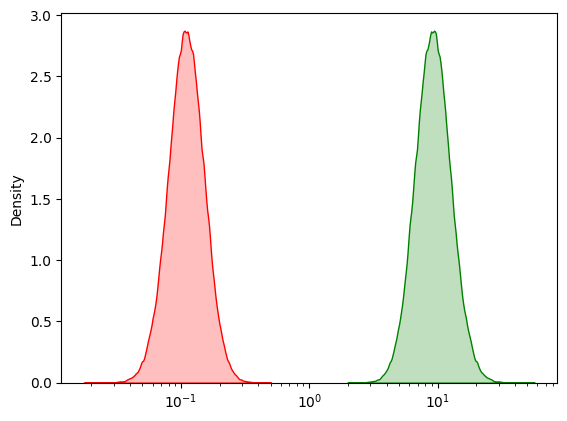

In [67]:
#Case 1
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case1_mix_coeffs_all.csv')

num = 100000

# Calculating the mixing ratios of samples CT-5, CT-6, CT-4
Ea = np.random.choice(CT_5_samples, size=num, replace=True) # ct-5 erosion rates 100000
Eb = np.random.choice(CT_6_samples, size=num, replace=True) # ct-6 erosion rates 100000
Ec = np.random.choice(CT_4_samples, size=num, replace=True) # ct-4 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-5
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-6

# areas are constant
Aa = WA[4]
Ab = WA[5]
Ac = WA[3]

# Calculations of mixing ratios
Za_Zc = w1 * ((Ec*Ac) / (Ea*Aa)) # Za/Zc
Zb_Zc = w2 * ((Ec*Ac) / (Eb*Ab)) #Zb/Zc
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc
            
# inverse
Zb_Za = 1 / Za_Zb

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-6/5: {0:6.4f} ± {1:6.4f}".format(np.median(resultsZb_Za), two_sig_b))
print("CT-5/6: {0:6.4f} ± {1:6.4f}".format(np.median(resultsZa_Zb), two_sig_a))
print("")

#CT-6/CT-5
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-6/CT-5")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-5/CT-6
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-5/CT-6")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquartile range
print("ct6_ct5 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct5_ct6 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/2389825203.py:30: RuntimeWarning: divide by zero encountered in divide
  Za_Zb = Za_Zc / Zb_Zc
/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/2389825203.py:52: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)


CT-6/5: 2.5172 ± 2.1064
CT-5/6: 0.3962 ± 483142751253280.4375

CT-6/CT-5
Mean:  2.6206217669716
Median:  2.5171889211190384
Calculations:  100000
CT-5/CT-6
Mean:  6108418698486.206
Median:  0.3961801452469785
Calculations:  99349
ct6_ct5 Fertility Ratio (median, (25-75% range)): 2.5172 (1.9141 - 3.2185)
ct5_ct6 Fertility Ratio (median, (25-75% range)): 0.3973 (0.3107 - 0.5224)


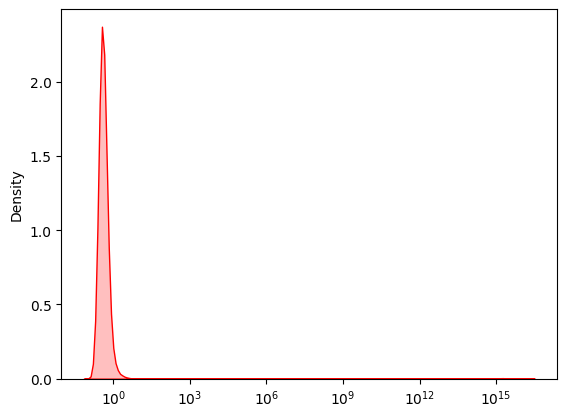

In [68]:
#Case 2
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case2_mix_coeffs_all.csv')

num = 100000

# Calculating the mixing ratios of samples CT-5, CT-6, CT-4
Ea = np.random.choice(CT_5_samples, size=num, replace=True) # ct-5 erosion rates 100000
Eb = np.random.choice(CT_6_samples, size=num, replace=True) # ct-6 erosion rates 100000
Ec = np.random.choice(CT_4_samples, size=num, replace=True) # ct-4 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-5
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-6

# areas are constant
Aa = WA[4]
Ab = WA[5]
Ac = WA[3]

# Calculations of mixing ratios
Za_Zc = w1 * ((Ec*Ac) / (Ea*Aa)) # Za/Zc
Zb_Zc = w2 * ((Ec*Ac) / (Eb*Ab)) #Zb/Zc

# # filter out zeros
# nonzero_indices_a = np.where(Za_Zc !=0)
# nonzero_indices_b = np.where(Zb_Zc !=0)
# Za_Zc = Za_Zc[nonzero_indices_a]
# Zb_Zc = Zb_Zc[nonzero_indices_b]

# comparing catchments
Za_Zb = Za_Zc / Zb_Zc
            
# inverse
Zb_Za = 1 / Za_Zb

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-6/5: {0:6.4f} ± {1:6.4f}".format(np.median(resultsZb_Za), two_sig_b))
print("CT-5/6: {0:6.4f} ± {1:6.4f}".format(np.median(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-6/CT-5
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-6/CT-5")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-5/CT-6
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-5/CT-6")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ct6_ct5 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct5_ct6 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/843856129.py:24: RuntimeWarning: divide by zero encountered in divide
  Za_Zb = Za_Zc / Zb_Zc
/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/843856129.py:46: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)


CT-6/5: 1.3575 ± 1.6813
CT-5/6: 35287044346451.2891 ± 769720159947414.6250

CT-6/CT-5
Mean:  1.3575234125862585
Median:  1.2613675818441732
Calculations:  100000
CT-5/CT-6
Mean:  35287044346451.29
Median:  0.7724854236709615
Calculations:  96514
ct6_ct5 Fertility Ratio (median, (25-75% range)): 1.2614 (0.7841 - 1.8254)
ct5_ct6 Fertility Ratio (median, (25-75% range)): 0.7928 (0.5478 - 1.2753)


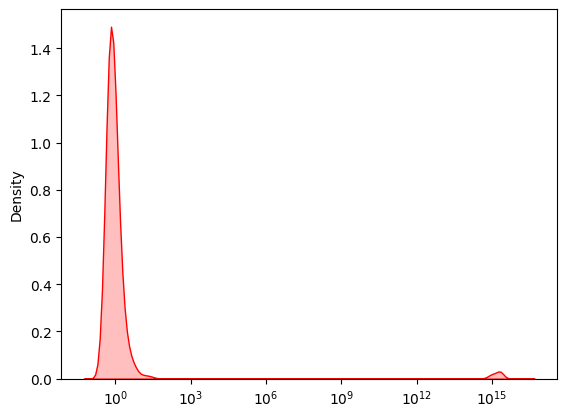

In [69]:
#Case 3
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case3_mix_coeffs_all.csv')

num = 100000

# Calculating the mixing ratios of samples CT-5, CT-6, CT-4
Ea = np.random.choice(CT_5_samples, size=num, replace=True) # ct-5 erosion rates 100000
Eb = np.random.choice(CT_6_samples, size=num, replace=True) # ct-6 erosion rates 100000
Ec = np.random.choice(CT_4_samples, size=num, replace=True) # ct-4 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-5
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-6

# areas are constant
Aa = WA[4]
Ab = WA[5]
Ac = WA[3]

# Calculations of mixing ratios
Za_Zc = w1 * ((Ec*Ac) / (Ea*Aa)) # Za/Zc
Zb_Zc = w2 * ((Ec*Ac) / (Eb*Ab)) #Zb/Zc
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc
            
# inverse
Zb_Za = 1 / Za_Zb

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-6/5: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-5/6: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-6/CT-5
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-6/CT-5")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-5/CT-6
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-5/CT-6")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ct6_ct5 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct5_ct6 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/644163244.py:24: RuntimeWarning: divide by zero encountered in divide
  Za_Zb = Za_Zc / Zb_Zc
/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/644163244.py:46: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)


CT-6/5: 0.4646 ± 1.0733
CT-5/6: 250906099664141.1562 ± 2288003647949618.0000

CT-6/CT-5
Mean:  0.46459389785876337
Median:  0.29941859806213944
Calculations:  100000
CT-5/CT-6
Mean:  250906099664141.16
Median:  2.192128171971282
Calculations:  79231
ct6_ct5 Fertility Ratio (median, (25-75% range)): 0.2994 (0.0000 - 0.7449)
ct5_ct6 Fertility Ratio (median, (25-75% range)): 3.3398 (1.3425 - 1898477099759768.5000)


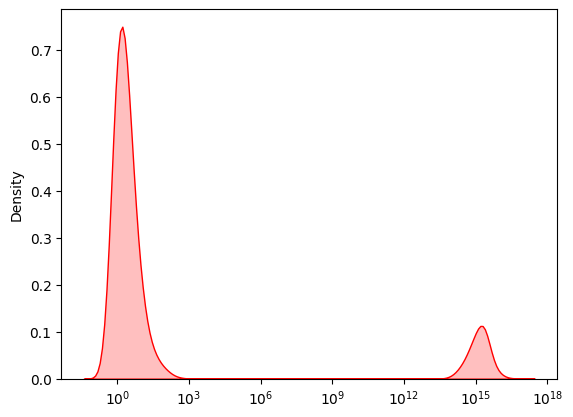

In [70]:
#Case 4
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case4_mix_coeffs_all.csv')

num = 100000

# Calculating the mixing ratios of samples CT-5, CT-6, CT-4
Ea = np.random.choice(CT_5_samples, size=num, replace=True) # ct-5 erosion rates 100000
Eb = np.random.choice(CT_6_samples, size=num, replace=True) # ct-6 erosion rates 100000
Ec = np.random.choice(CT_4_samples, size=num, replace=True) # ct-4 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-5
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-6

# areas are constant
Aa = WA[4]
Ab = WA[5]
Ac = WA[3]

# Calculations of mixing ratios
Za_Zc = w1 * ((Ec*Ac) / (Ea*Aa)) # Za/Zc
Zb_Zc = w2 * ((Ec*Ac) / (Eb*Ab)) #Zb/Zc
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc
            
# inverse
Zb_Za = 1 / Za_Zb

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-6/5: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-5/6: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-6/CT-5
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-6/CT-5")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-5/CT-6
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-5/CT-6")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ct6_ct5 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct5_ct6 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/1445936131.py:24: RuntimeWarning: divide by zero encountered in divide
  Za_Zb = Za_Zc / Zb_Zc
/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/1445936131.py:46: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)


CT-6/5: 0.5400 ± 1.0000
CT-5/6: 120631130167429.5938 ± 1107357696123508.2500

CT-6/CT-5
Mean:  0.5399565819051211
Median:  0.4524228697742207
Calculations:  100000
CT-5/CT-6
Mean:  120631130167429.6
Median:  1.7964658912056468
Calculations:  84657
ct6_ct5 Fertility Ratio (median, (25-75% range)): 0.4524 (0.0856 - 0.8389)
ct5_ct6 Fertility Ratio (median, (25-75% range)): 2.2103 (1.1920 - 11.6881)


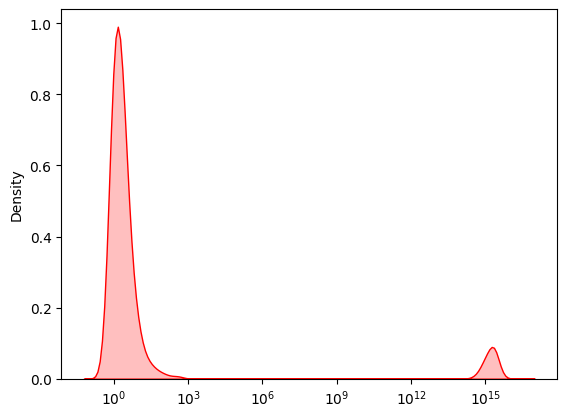

In [71]:
#Case 5
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case5_mix_coeffs_all.csv')

num = 100000

# Calculating the mixing ratios of samples CT-5, CT-6, CT-4
Ea = np.random.choice(CT_5_samples, size=num, replace=True) # ct-5 erosion rates 100000
Eb = np.random.choice(CT_6_samples, size=num, replace=True) # ct-6 erosion rates 100000
Ec = np.random.choice(CT_4_samples, size=num, replace=True) # ct-4 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-5
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-6

# areas are constant
Aa = WA[4]
Ab = WA[5]
Ac = WA[3]

# Calculations of mixing ratios
Za_Zc = w1 * ((Ec*Ac) / (Ea*Aa)) # Za/Zc
Zb_Zc = w2 * ((Ec*Ac) / (Eb*Ab)) #Zb/Zc
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc
            
# inverse
Zb_Za = 1 / Za_Zb

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-6/5: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-5/6: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-6/CT-5
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-6/CT-5")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-5/CT-6
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-5/CT-6")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ct6_ct5 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct5_ct6 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


# Calculate 5 cases of CT-4synthetic mixture modeling for Zr Child CT-2

/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/4189405206.py:31: RuntimeWarning: divide by zero encountered in divide
  Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/4189405206.py:53: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)


CT-Canyon/4: 3.7823 ± 3.5850
CT-4/Canyon: 6104945677432.7139 ± 264144545073863.2500

CT-Canyon/CT-4
Mean:  3.7823049078462865
Median:  3.5976739441522745
Calculations:  99860

CT-4/CT-Canyon
Mean:  6104945677432.714
Median:  0.27733636049968746
Calculations:  99469
ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): 3.5977 (2.4867 - 4.8897)
ct4_ctcanyon Fertility Ratio (median, (25-75% range)): 0.2780 (0.2045 - 0.4021)


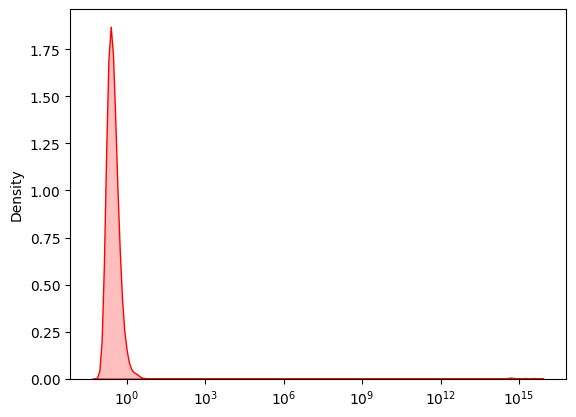

In [82]:
#Case 1
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case1_mix_coeffs_all_CT-2Child.csv')

num = 100000

# Calculating the mixing ratios of samples CT-4syn, CT-canyon, CT-2
Ea = np.random.choice(CT_5_6_samples, size=num, replace=True) # ct-4syn erosion rates 100000
Eb = np.random.choice(CT_canyon_samples, size=num, replace=True) # ct-canyon erosion rates 100000
Ec = np.random.choice(CT_2_samples, size=num, replace=True) # ct-2 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-4syn
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-canyon

#sns.kdeplot(w1, bw_adjust=.5, fill=True, color="green", log_scale=False)
#sns.kdeplot(w2, bw_adjust=.5, fill=True, color="blue", log_scale=False)
#sns.kdeplot(Ec, bw_adjust=.5, fill=True, color="red", log_scale=False)

# sets conditions to make sure the rates are ordered properly
i = np.where(np.logical_or(np.logical_and(Ea > Ec, Ec > Eb), np.logical_and(Eb > Ec, Ec > Ea)))

# areas are constant
Aa = WA[3]
Ab = canyon_area
Ac = WA[1]

# Calculations of mixing ratios
Za_Zc = w1[i] * ((Ec[i]*Ac) / (Ea[i]*Aa)) # Za/Zc 4syn/2
Zb_Zc = w2[i] * ((Ec[i]*Ac) / (Eb[i]*Ab)) #Zb/Zc canyon/2
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
            
# inverse
Zb_Za = 1 / Za_Zb # canyon/4syn

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-Canyon/4: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-4/Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a)) 
print("")

# Plot results
#CT-canyon/CT-4
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-Canyon/CT-4")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))
print("")

#CT-4/CT-canyon
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=False)
print("CT-4/CT-Canyon")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct4_ctcanyon Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


CT-Canyon/4syn: 7.0595 ± 4.3295
CT-4syn/Canyon: 0.1591 ± 0.1475

CT-Canyon/CT-4syn
Mean:  7.059452197454925
Median:  6.928063798472695
Calculations:  99831

CT-4syn/CT-Canyon
Mean:  0.15910204566798583
Median:  0.14434047218509333
Calculations:  99831
ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): 6.9281 (5.5911 - 8.3808)
ct4_ctcanyon Fertility Ratio (median, (25-75% range)): 0.1443 (0.1193 - 0.1789)


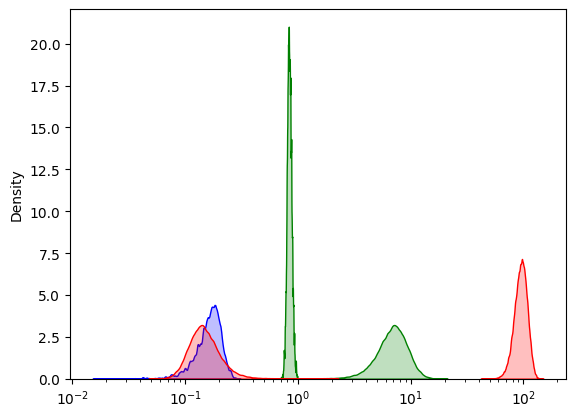

In [84]:
#Case 2
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case2_mix_coeffs_all_CT-2Child.csv')

num = 100000

# Calculating the mixing ratios of samples CT-4syn, CT-canyon, CT-2
Ea = np.random.choice(CT_5_6_samples, size=num, replace=True) # ct-4syn erosion rates 100000
Eb = np.random.choice(CT_canyon_samples, size=num, replace=True) # ct-canyon erosion rates 100000
Ec = np.random.choice(CT_2_samples, size=num, replace=True) # ct-2 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-4syn
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-canyon

sns.kdeplot(w1, bw_adjust=.5, fill=True, color="green", log_scale=True)
sns.kdeplot(w2, bw_adjust=.5, fill=True, color="blue", log_scale=True)
sns.kdeplot(Ec, bw_adjust=.5, fill=True, color="red", log_scale=True)

# sets conditions to make sure the rates are ordered properly
i = np.where(np.logical_or(np.logical_and(Ea > Ec, Ec > Eb), np.logical_and(Eb > Ec, Ec > Ea)))

# areas are constant
Aa = WA[3]
Ab = canyon_area
Ac = WA[1]

# Calculations of mixing ratios
Za_Zc = w1[i] * ((Ec[i]*Ac) / (Ea[i]*Aa)) # Za/Zc 4syn/2
Zb_Zc = w2[i] * ((Ec[i]*Ac) / (Eb[i]*Ab)) #Zb/Zc canyon/2
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
            
# inverse
Zb_Za = 1 / Za_Zb # canyon/4syn

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-Canyon/4syn: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-4syn/Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-canyon/CT-4syn
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=False)
print("CT-Canyon/CT-4syn")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))
print("")

#CT-4syn/CT-canyon
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=False)
print("CT-4syn/CT-Canyon")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct4_ctcanyon Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/1029020337.py:31: RuntimeWarning: divide by zero encountered in divide
  Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon


CT-Canyon/4syn: 5.7659 ± 4.8174
CT-4syn/Canyon: 6104599119042.7812 ± 336395325718913.1875

CT-Canyon/CT-4syn
Mean:  5.765947760964259
Median:  5.702085370262349
Calculations:  99841

CT-4syn/CT-Canyon
Mean:  6104599119042.781
Median:  0.17527404359781604
Calculations:  99714
ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): 5.7021 (4.0956 - 7.3231)
ct4_ctcanyon Fertility Ratio (median, (25-75% range)): 0.1754 (0.1366 - 0.2442)


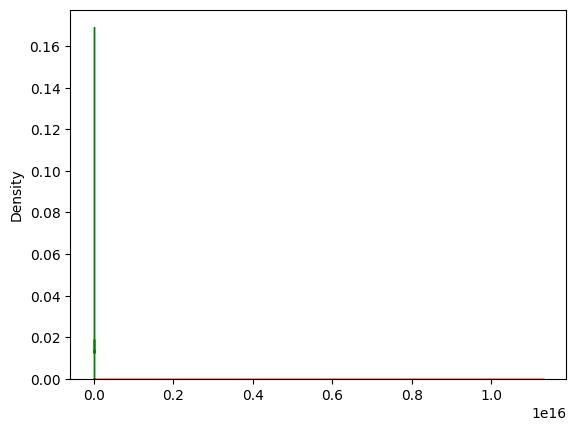

In [85]:
#Case 3
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case3_mix_coeffs_all_CT-2Child.csv')

num = 100000

# Calculating the mixing ratios of samples CT-4syn, CT-canyon, CT-2
Ea = np.random.choice(CT_5_6_samples, size=num, replace=True) # ct-4syn erosion rates 100000
Eb = np.random.choice(CT_canyon_samples, size=num, replace=True) # ct-canyon erosion rates 100000
Ec = np.random.choice(CT_2_samples, size=num, replace=True) # ct-2 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-4syn
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-canyon

# sns.kdeplot(w1, bw_adjust=.5, fill=True, color="green", log_scale=False)
# sns.kdeplot(w2, bw_adjust=.5, fill=True, color="blue", log_scale=False)
# sns.kdeplot(Ec, bw_adjust=.5, fill=True, color="red", log_scale=False)

# sets conditions to make sure the rates are ordered properly
i = np.where(np.logical_or(np.logical_and(Ea > Ec, Ec > Eb), np.logical_and(Eb > Ec, Ec > Ea)))

# areas are constant
Aa = WA[3]
Ab = canyon_area
Ac = WA[1]

# Calculations of mixing ratios
Za_Zc = w1[i] * ((Ec[i]*Ac) / (Ea[i]*Aa)) # Za/Zc 4syn/2
Zb_Zc = w2[i] * ((Ec[i]*Ac) / (Eb[i]*Ab)) #Zb/Zc canyon/2
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
            
# inverse
Zb_Za = 1 / Za_Zb # canyon/4syn

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-Canyon/4syn: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-4syn/Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-canyon/CT-4syn
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=False)
print("CT-Canyon/CT-4syn")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))
print("")

#CT-4syn/CT-canyon
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=False)
print("CT-4syn/CT-Canyon")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct4_ctcanyon Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


CT-Canyon/4syn: 9.8312 ± 4.6842
CT-4syn/Canyon: 0.1077 ± 0.0543

CT-Canyon/CT-4syn
Mean:  9.831230083839168
Median:  9.618055513544832
Calculations:  99834

CT-4syn/CT-Canyon
Mean:  0.1077471443076595
Median:  0.10397111958824114
Calculations:  99834
ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): 9.6181 (8.2085 - 11.2185)
ct4_ctcanyon Fertility Ratio (median, (25-75% range)): 0.1040 (0.0891 - 0.1218)


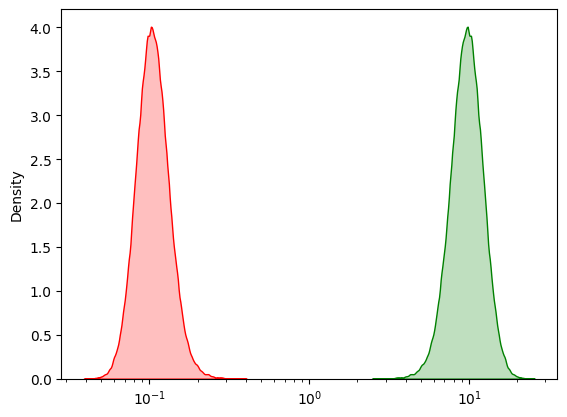

In [86]:
# Case 4
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case4_mix_coeffs_all_CT-2Child.csv')

num = 100000

# Calculating the mixing ratios of samples CT-4syn, CT-canyon, CT-2
Ea = np.random.choice(CT_5_6_samples, size=num, replace=True) # ct-4syn erosion rates 100000
Eb = np.random.choice(CT_canyon_samples, size=num, replace=True) # ct-canyon erosion rates 100000
Ec = np.random.choice(CT_2_samples, size=num, replace=True) # ct-2 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-4syn
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-canyon

#sns.kdeplot(w1, bw_adjust=.5, fill=True, color="green", log_scale=False)
#sns.kdeplot(w2, bw_adjust=.5, fill=True, color="blue", log_scale=False)
#sns.kdeplot(Ec, bw_adjust=.5, fill=True, color="red", log_scale=False)

# sets conditions to make sure the rates are ordered properly
i = np.where(np.logical_or(np.logical_and(Ea > Ec, Ec > Eb), np.logical_and(Eb > Ec, Ec > Ea)))

# areas are constant
Aa = WA[3]
Ab = canyon_area
Ac = WA[1]

# Calculations of mixing ratios
Za_Zc = w1[i] * ((Ec[i]*Ac) / (Ea[i]*Aa)) # Za/Zc 4syn/2
Zb_Zc = w2[i] * ((Ec[i]*Ac) / (Eb[i]*Ab)) #Zb/Zc canyon/2
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
            
# inverse
Zb_Za = 1 / Za_Zb # canyon/4syn

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-Canyon/4syn: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-4syn/Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-canyon/CT-4syn
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-Canyon/CT-4syn")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))
print("")

#CT-4syn/CT-canyon
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-4syn/CT-Canyon")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct4_ctcanyon Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


CT-Canyon/4syn: 8.4532 ± 4.4944
CT-4syn/Canyon: 0.1282 ± 0.0997

CT-Canyon/CT-4syn
Mean:  8.45316391032227
Median:  8.296770620255833
Calculations:  99860
CT-4syn/CT-Canyon
Mean:  0.12820179122586553
Median:  0.1205288232975146
Calculations:  99860
ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): 8.2968 (6.9237 - 9.8030)
ct4_ctcanyon Fertility Ratio (median, (25-75% range)): 0.1205 (0.1020 - 0.1444)


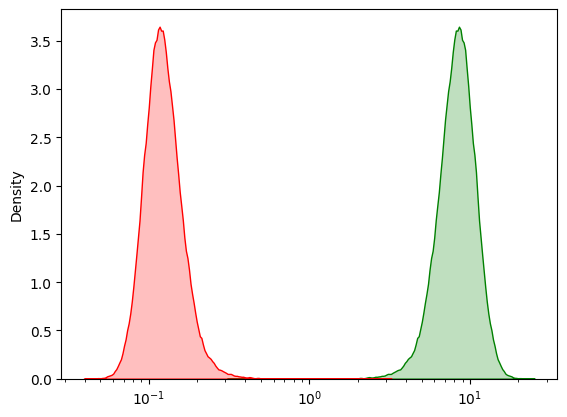

In [87]:
#Case 5
# Read data from CSV 
df = pd.read_csv('/Users/Glong1/Desktop/detritalPy-master/detritalPy/ct-4Case5_mix_coeffs_all_CT-2Child.csv')

num = 100000

# Calculating the mixing ratios of samples CT-4syn, CT-canyon, CT-2
Ea = np.random.choice(CT_5_6_samples, size=num, replace=True) # ct-4syn erosion rates 100000
Eb = np.random.choice(CT_canyon_samples, size=num, replace=True) # ct-canyon erosion rates 100000
Ec = np.random.choice(CT_2_samples, size=num, replace=True) # ct-2 erosion rates 100000
w1 = np.random.choice(df['Column1'], size=num, replace=True) # ct-4syn
w2 = np.random.choice(df['Column2'], size=num, replace=True) # ct-canyon

#sns.kdeplot(w1, bw_adjust=.5, fill=True, color="green", log_scale=False)
#sns.kdeplot(w2, bw_adjust=.5, fill=True, color="blue", log_scale=False)
#sns.kdeplot(Ec, bw_adjust=.5, fill=True, color="red", log_scale=False)

# order the rates
i = np.where(np.logical_or(np.logical_and(Ea > Ec, Ec > Eb), np.logical_and(Eb > Ec, Ec > Ea)))

# areas are constant
Aa = WA[3]
Ab = canyon_area
Ac = WA[1]

# Calculations of mixing ratios
Za_Zc = w1[i] * ((Ec[i]*Ac) / (Ea[i]*Aa)) # Za/Zc 4syn/2
Zb_Zc = w2[i] * ((Ec[i]*Ac) / (Eb[i]*Ab)) #Zb/Zc canyon/2
        
# comparing catchments
Za_Zb = Za_Zc / Zb_Zc # 4syn/canyon
            
# inverse
Zb_Za = 1 / Za_Zb # canyon/4syn

# filter out infinite values and store in results
resultsZb_Za = Zb_Za[np.isfinite(Zb_Za)]
resultsZa_Zb = Za_Zb[np.isfinite(Za_Zb)]

# print results with 2sig error
std_dev_b = np.std(resultsZb_Za)
two_sig_b = 2 * std_dev_b

std_dev_a = np.std(resultsZa_Zb)
two_sig_a = 2 * std_dev_a

print("CT-Canyon/4syn: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZb_Za), two_sig_b))
print("CT-4syn/Canyon: {0:6.4f} ± {1:6.4f}".format(np.mean(resultsZa_Zb), two_sig_a))
print("")

# Plot results
#CT-canyon/CT-4syn
sns.kdeplot(resultsZb_Za, bw_adjust=.5, fill=True, color="green", log_scale=True)
print("CT-Canyon/CT-4syn")
print("Mean: ", np.mean(resultsZb_Za))
print("Median: ", np.median(resultsZb_Za))
print("Calculations: ", len(resultsZb_Za))

#CT-4syn/CT-canyon
sns.kdeplot(resultsZa_Zb, bw_adjust=.5, fill=True, color="red", log_scale=True)
print("CT-4syn/CT-Canyon")
print("Mean: ", np.mean(resultsZa_Zb))
print("Median: ", np.median(resultsZa_Zb))
print("Calculations: ", len(resultsZa_Zb))

#interquatile range
print("ctcanyon_ct4 Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Zb_Za), np.percentile(Zb_Za, 75), np.percentile(Zb_Za, 25)))
print("ct4_ctcanyon Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(Za_Zb), np.percentile(Za_Zb, 75), np.percentile(Za_Zb, 25)))


# Calculate Production Rates 

In [ ]:
# P=NE/capital lambda
atten = 160 #g/cm^2 attenuation length. fixed constant 

p = 2.6 # g/cm^3 density

#atten = (0.01036 + -9.697E+10^-6

N = np.array([5.45E+05, 8.46E+04, 1.15E+05, 2.98E+05, 2.88E+04, 3.03E+05, 2.33E+04, 1.54E+05]) # nuclide concentration in atom/g
Nu = np.array([6.58E+03, .1, 2.15E+03, 5.92E+03, 6.86E+02, 5.70E+03, 1.34E+03]) # nuclide concentration uncertainty w/out +13%
E = np.array([22.9, 94.8, 29.5, 29.6, 387, 29.8, 532, 20.3]) # erosion rate in m/myr
Eu = np.array([1.84, 3.06, 2.35, 2.36, 30.6, 2.38, 42]) # erosion rate uncertainty from using no uncertainty in CRONUS m/myr

Ecm = (E * 100) / 1000000 # erosion rate in cm/yr

print("Production Rates (atm/g/yr):")

P = N * Ecm * p / atten

print(P)

# Calculating Fertility Ratios 5,6 to 4

In [51]:
import csv

filename = 'ct-4_mix_coeffs_all.csv'

wct_5, wct_6 = [], []

with open(filename, 'r') as file:
    csvfile = csv.reader(file)
    next(csvfile)
    for row in csvfile:
        wct_5.append(float(row[0]))
        wct_6.append(float(row[1]))

ratio = np.array(wct_5) / np.array(wct_6)

WCT_5 = 0.257
WCT_6 = 0.743

num = 10000

ratio = ratio[ratio != 0]
ratio = np.random.choice(ratio, replace = True, size = num)


ER_CT6 = np.random.normal(ER[5], ERU[5], num) # ct-5 erosion rates 100000
ER_CT5 = np.random.normal(ER[4], ERU[4], num) # ct-6 erosion rates 100000

ZA_ZB = ratio/WCT_6 * ER_CT6*WA[5] / (ER_CT5*WA[4])

print(np.median(1/ZA_ZB))
print("ZB_ZA Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(1/ZA_ZB), np.percentile(1/ZA_ZB, 75), np.percentile(1/ZA_ZB, 25)))

17.081027276840764
ZB_ZA Fertility Ratio (median, (25-75% range)): 17.0810 (12.4899 - 24.6384)


In [52]:
print("ZA_ZB Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZA_ZB), np.percentile(ZA_ZB, 75), np.percentile(ZA_ZB, 25)))

ZA_ZB Fertility Ratio (median, (25-75% range)): 0.0585 (0.0406 - 0.0801)


# Calculating Feritlity Ratios 5,6,Canyon to

In [61]:
import csv

filename = 'ct-2_mix_coeffs_all.csv'

wct_5, wct_6, wcanyon = [], [], []

with open(filename, 'r') as file:
    csvfile = csv.reader(file)
    next(csvfile)
    for row in csvfile:
        wct_5.append(float(row[0]))
        wct_6.append(float(row[1]))
        wcanyon.append(float(row[2]))


CA_ER = canyon_erosion_rate
CA_ERU = canyon_erosion_rate_uncertainty
CA_WA = canyon_area    

# WCT_5 = 0.398
# WCT_6 = 0.453
# WCT_Canyon = 0.149

num = 10000

# random sampling for the zr weighst
wct_5_sampled = np.random.choice(wct_5, size=num, replace=True)
wct_6_sampled = np.random.choice(wct_6, size=num, replace=True)
wcanyon_sampled = np.random.choice(wcanyon, size=num, replace=True)

# random sampling for the ERs
ER_CT6 = np.random.normal(ER[5], ERU[5], num) # ct-5 erosion rates 100000
ER_CT5 = np.random.normal(ER[4], ERU[4], num) # ct-6 erosion rates 100000
ER_CT_Canyon = np.random.normal(CA_ER, CA_ERU, num) # ct-canyon erosion rates 100000


ZA_ZD = wct_5_sampled * ((ER[4]*WA[4]) + (ER[5]*WA[5]) + (CA_ER*CA_WA)) / (ER[4]*WA[4])
ZB_ZD = wct_6_sampled * ((ER[4]*WA[4]) + (ER[5]*WA[5]) + (CA_ER*CA_WA)) / (ER[5]*WA[5])
ZC_ZD = wcanyon_sampled * ((ER[4]*WA[4]) + (ER[5]*WA[5]) + (CA_ER*CA_WA)) / (CA_ER*CA_WA)

ZA_ZB = ZA_ZD / ZB_ZD
ZB_ZA = ZB_ZD / ZA_ZD
ZA_ZC = ZA_ZD / ZC_ZD
ZC_ZA = ZC_ZD / ZA_ZD
ZB_ZC = ZB_ZD / ZC_ZD
ZC_ZB = ZC_ZD / ZB_ZD

print(np.median(ZA_ZD))
print(np.median(ZB_ZD))
print(np.median(ZC_ZD))
print()
print(('A_B'),np.median(ZA_ZB))
print(('A_C'),np.median(ZA_ZC))
print(('B_A'),np.median(ZB_ZA))
print(('C_A'),np.median(ZC_ZA))
print(('C_B'),np.median(ZC_ZB))
print()
print("ZB_ZA Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZB_ZA), np.percentile(ZB_ZA, 75), np.percentile(ZB_ZA, 25)))
print("ZA_ZB Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZA_ZB), np.percentile(ZA_ZB, 75), np.percentile(ZA_ZB, 25)))
print("ZA_ZC Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZA_ZC), np.percentile(ZA_ZC, 75), np.percentile(ZA_ZC, 25)))
print("ZC_ZA Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZC_ZA), np.percentile(ZC_ZA, 75), np.percentile(ZC_ZA, 25)))
print("ZB_ZC Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZB_ZC), np.percentile(ZB_ZC, 75), np.percentile(ZB_ZC, 25)))
print("ZC_ZB Fertility Ratio (median, (25-75% range)): {0:6.4f} ({2:6.4f} - {1:6.4f})".format(np.median(ZC_ZB), np.percentile(ZC_ZB, 75), np.percentile(ZC_ZB, 25)))


0.43095184751316407
4.563293081520976
3.3299312242348313

A_B 0.08985180703128759
A_C 0.12552109898397704
B_A 11.129436754892144
C_A 7.966788118554605
C_B 0.7160866529455137

ZB_ZA Fertility Ratio (median, (25-75% range)): 11.1294 (7.6119 - 16.5912)
ZA_ZB Fertility Ratio (median, (25-75% range)): 0.0899 (0.0603 - 0.1314)
ZA_ZC Fertility Ratio (median, (25-75% range)): 0.1255 (0.0813 - 0.1976)
ZC_ZA Fertility Ratio (median, (25-75% range)): 7.9668 (5.0606 - 12.3006)
ZB_ZC Fertility Ratio (median, (25-75% range)): 1.3965 (0.9433 - 2.1656)
ZC_ZB Fertility Ratio (median, (25-75% range)): 0.7161 (0.4618 - 1.0601)


/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/3691472626.py:41: RuntimeWarning: divide by zero encountered in divide
  ZA_ZB = ZA_ZD / ZB_ZD
/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/3691472626.py:42: RuntimeWarning: divide by zero encountered in divide
  ZB_ZA = ZB_ZD / ZA_ZD
/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/3691472626.py:43: RuntimeWarning: divide by zero encountered in divide
  ZA_ZC = ZA_ZD / ZC_ZD
/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/3691472626.py:44: RuntimeWarning: divide by zero encountered in divide
  ZC_ZA = ZC_ZD / ZA_ZD
/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/3691472626.py:45: RuntimeWarning: divide by zero encountered in divide
  ZB_ZC = ZB_ZD / ZC_ZD
/var/folders/q2/0xd1lglj6lzdx_7wr72bt7t00000gp/T/ipykernel_47475/3691472626.py:46: RuntimeWarning: divide by zero encountered in divide
  ZC_ZB = ZC_ZD / ZB_ZD
